In [23]:
import json 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
results = []
base_path = "FeatureSubsetResultsLR_JSON"

for json_file in os.listdir(base_path): 
    f = open(os.path.join(base_path,json_file))
    data = json.load(f)

    dataset = data["dataset"].split(".csv")[0]
    for res in data["results_by_k"]: 
        feature_no = res["k"]
        features = res["features"]

        for score_name in res["scores"]:
            mean = res["scores"][score_name]["mean"]
            std = res["scores"][score_name]["std"]

            dict = {"dataset" :  dataset,
                    "feature_no" : feature_no,
                    "features" : features,
                    "score_name" : score_name,
                    "score_mean" : mean,
                    "score_std" : std}

            results.append(dict)

result_data = pd.DataFrame(results)

In [21]:
result_data

,dataset,feature_no,features,score_name,score_mean,score_std
0,RandomData_2_20_20,5,"[Rel Volume, Fragile Sequence, width_height_mi...",accuracy,0.937113,0.001262
1,RandomData_2_20_20,5,"[Rel Volume, Fragile Sequence, width_height_mi...",f1,0.883931,0.002198
2,RandomData_2_20_20,5,"[Rel Volume, Fragile Sequence, width_height_mi...",roc_auc,0.986133,0.000799
3,RandomData_2_20_20,5,"[Rel Volume, Fragile Sequence, width_height_mi...",mcc,0.844916,0.002955
4,RandomData_2_20_20,6,"[Rel Volume, Fragile Sequence, width_height_mi...",accuracy,0.938097,0.001586
...,...,...,...,...,...,...
1607,RandomData_5_40_40,34,"[NoCustomers, Rel Volume, Rel Weight, Weight D...",mcc,0.846377,0.000996
1608,RandomData_5_40_40,35,"[NoCustomers, Rel Volume, Rel Weight, Weight D...",accuracy,0.940668,0.000639
1609,RandomData_5_40_40,35,"[NoCustomers, Rel Volume, Rel Weight, Weight D...",f1,0.881302,0.001157
1610,RandomData_5_40_40,35,"[NoCustomers, Rel Volume, Rel Weight, Weight D...",roc_auc,0.988151,0.000314


seaborn.lineplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, weights=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, orient='x', sort=True, err_style='band', err_kws=None, legend='auto', ci='deprecated', ax=None, **kwargs)#

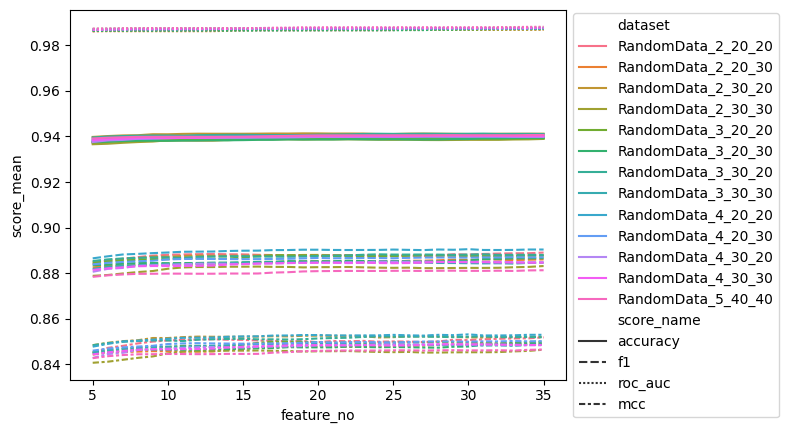

In [28]:
ax = sns.lineplot(data = result_data, y = "score_mean", x = "feature_no",hue = "dataset", style = "score_name")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.01))

In [43]:
grouped_dfs= result_data.groupby(["dataset","score_name"]).mean(numeric_only=True).reset_index()

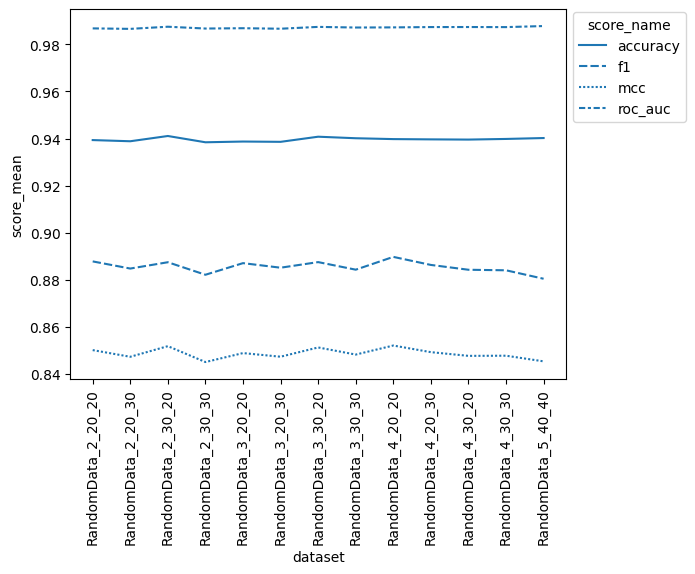

In [46]:
ax = sns.lineplot(data = grouped_dfs, y = "score_mean", x = "dataset", style = "score_name")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.01))
plt.xticks(rotation=90)
plt.show()